In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define a function to create random adjacency matrix of a weighted directed graph with n nodes and weights between -10 and 10 with weights less than a threshold set to 0 and diagonal elements zero
def create_adj_matrix(n, threshold):
    # create a random adjacency matrix
    adj_matrix = np.random.rand(n, n) * 20 - 10
    # set the diagonal elements to zero
    np.fill_diagonal(adj_matrix, 0)
    # set the weights less than threshold to zero
    adj_matrix[abs(adj_matrix) < threshold] = 0
    # return the adjacency matrix
    return adj_matrix


#  define a function to plot the graph
def plot_graph(adj_matrix):
    G = nx.from_numpy_matrix(adj_matrix)
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0]
    # positions for all nodes - seed for reproducibility
    pos = nx.spring_layout(G, seed=7)
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1)
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color="b", width=0.1)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=0.1, alpha=0.5, edge_color="r", style="dashed")
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=1, font_family="sans-serif")
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title('For '+str(G))
    plt.show()


# define a function to compute the maximum and minimum eigenvalues of the adjacency matrix
def compute_eigenvalues(adj_matrix):
    # compute the maximum eigenvalue of the adjacency matrix
    max_eig = np.max(np.linalg.eigvals(adj_matrix))
    # compute the minimum eigenvalue of the adjacency matrix
    min_eig = np.min(np.linalg.eigvals(adj_matrix))
    # return the maximum and minimum eigenvalues
    return max_eig, min_eig

# Checking the bounds found with G+G' assumption.
In this section I'm going to check the bounds for 2I+G+G'. 
- upper bound = max_eig_1 + max_eig_2 - 2
- lower bound = min_eig_1 + min_eig_2 - 2

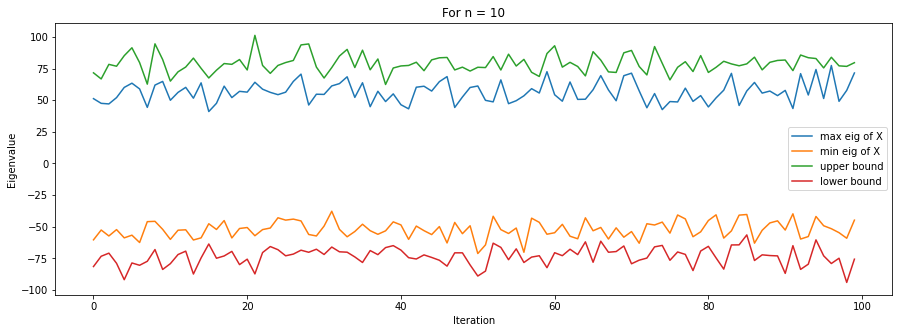

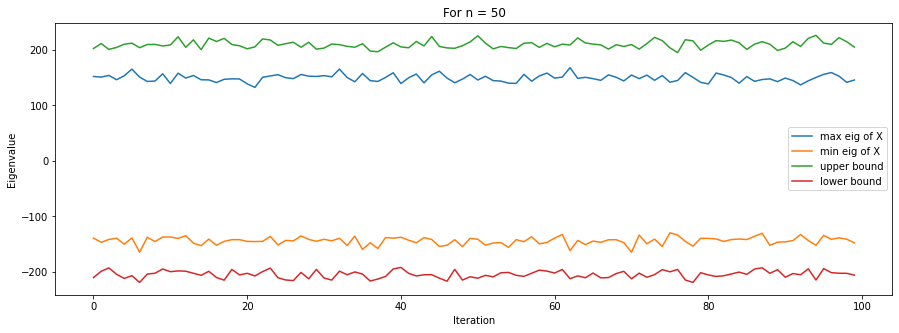

In [13]:

n_list = [10, 50]
for n in n_list:
    lower_bound = []
    upper_bound = []
    max_X = []
    min_X = []
    for i in range(100):
        # creating adjacency matrix for each layer (2 layers) with 50 nodes and 0.2 probability of zero elements for the first one and 0.5 for the second one
        adj_matrix1 = create_adj_matrix(n, 5)
        adj_matrix2 = create_adj_matrix(n, 2)
        # compute the maximum and minimum eigenvalues of the adjacency matrices
        max_eig1, min_eig1 = compute_eigenvalues(2*np.identity(n) + adj_matrix1 + adj_matrix1.T)
        max_eig2, min_eig2 = compute_eigenvalues(2*np.identity(n) + adj_matrix2 + adj_matrix2.T)
        lower_bound.append(min_eig1 + min_eig2 - 2)
        upper_bound.append(max_eig1 + max_eig2 - 2)
        # creating the sum (G = G11 + G11)
        adj_matrix = adj_matrix1 + adj_matrix2
        # creating the matrix we want to compute the eigenvalues of (2I+adj_matrix+adj_matrix.T)
        X = 2*np.identity(n) + adj_matrix + adj_matrix.T
        # computing the eigenvalues of the matrix   
        max_eig, min_eig = compute_eigenvalues(X)
        max_X.append(max_eig)
        min_X.append(min_eig)

    # plotting the lower and upper bounds and the eigenvalues of the matrix
    plt.figure(figsize=(15,5))
    plt.plot(max_X, label='max eig of X')
    plt.plot(min_X, label='min eig of X')
    plt.plot(upper_bound, label='upper bound')
    plt.plot(lower_bound, label='lower bound')
    plt.xlabel('Iteration')
    plt.ylabel('Eigenvalue')
    plt.title('Bounds check')
    plt.legend()
    plt.title('For n = '+str(n))
    plt.show()
    

# could not generate  matrices with G where G+G.T is PD.

Would we really need y_mins to be that large?
-> start with symmetric

# Checking bounds for PD matrices. 
In this section I generate PD matrices and check the bound on these specific matrices.

In [7]:
# generating a positive semi-definite matrix
def generate_psd_matrix(n):
    # create a random symmetric matrix
    A = np.random.rand(n, n)*20 - 10
    # create a positive semi-definite matrix
    B = np.dot(A, A.T)
    # return the positive semi-definite matrix
    return B

min_1 is 4.267290769609017 and min_2 is 2.056219439410411
lower bound is 4.323510209019428


min_1 is 14.5018863743385 and min_2 is 11.350607773506196
lower bound is 23.852494147844695


min_1 is 7.19887884338157 and min_2 is 3.7290904717524853
lower bound is 8.927969315134055


min_1 is 4.9961348806675785 and min_2 is 3.5967957846398857
lower bound is 6.592930665307463


min_1 is 3.3153858405230543 and min_2 is 13.366841345279877
lower bound is 14.68222718580293


min_1 is 2.0150047458121207 and min_2 is 8.597463636928381
lower bound is 8.612468382740502


min_1 is 3.3701830511510376 and min_2 is 3.689002855403202
lower bound is 5.059185906554239


min_1 is 2.3180551268957004 and min_2 is 2.4566033011340824
lower bound is 2.774658428029783


min_1 is 19.19164333525208 and min_2 is 2.0408938595050983
lower bound is 19.232537194757178


min_1 is 3.735499561059305 and min_2 is 2.0227776942704554
lower bound is 3.7582772553297605


min_1 is 2.184796490522293 and min_2 is 3.594544305145783

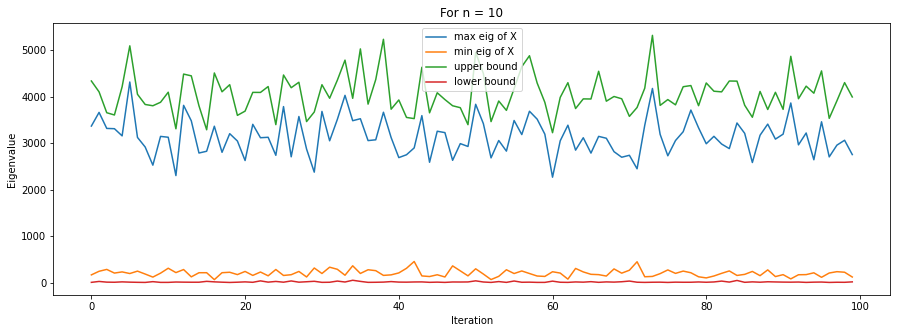

min_1 is 2.0060113224738267 and min_2 is 3.129201007317858
lower bound is 3.1352123297916847


min_1 is 3.0551728843396435 and min_2 is 2.569386676818524
lower bound is 3.6245595611581676


min_1 is 6.842868474547349 and min_2 is 2.0119382568389246
lower bound is 6.854806731386274


min_1 is 3.43512840430395 and min_2 is 2.647838333891543
lower bound is 4.082966738195493


min_1 is 2.031407298860189 and min_2 is 2.453875806986619
lower bound is 2.4852831058468077


min_1 is 2.069013382973416 and min_2 is 2.091634605663409
lower bound is 2.160647988636825


min_1 is 7.11700251219498 and min_2 is 2.0067312836204647
lower bound is 7.123733795815445


min_1 is 2.5352538609236945 and min_2 is 2.05799662332065
lower bound is 2.5932504842443445


min_1 is 2.0757634934962437 and min_2 is 2.3865069550963196
lower bound is 2.4622704485925633


min_1 is 5.004868825295933 and min_2 is 2.6378107566588875
lower bound is 5.6426795819548206


min_1 is 2.0430690227596093 and min_2 is 3.4943850201733078

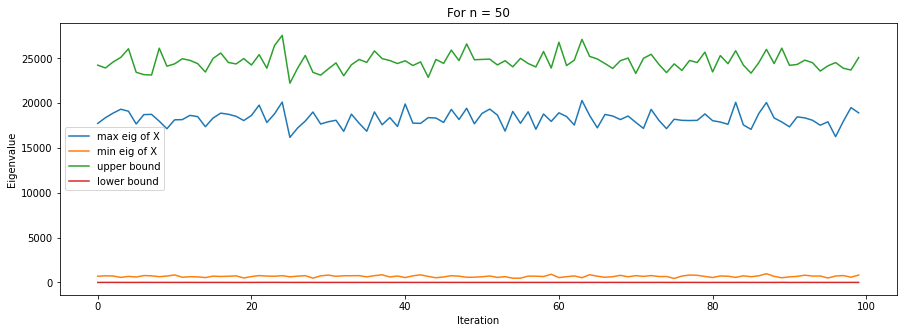

In [8]:
n_list = [10, 50]
for n in n_list:
    lower_bound = []
    upper_bound = []
    max_X = []
    min_X = []
    for i in range(100):
        # creating adjacency matrix for each layer (2 layers) with 50 nodes and 0.2 probability of zero elements for the first one and 0.5 for the second one
        adj_matrix1 = generate_psd_matrix(n)
        adj_matrix2 = generate_psd_matrix(n)
        # compute the maximum and minimum eigenvalues of the adjacency matrices
        max_eig1, min_eig1 = compute_eigenvalues(2*np.identity(n) + adj_matrix1 + adj_matrix1.T)
        max_eig2, min_eig2 = compute_eigenvalues(2*np.identity(n) + adj_matrix2 + adj_matrix2.T)
        print('min_1 is ' + str(min_eig1) + ' and min_2 is ' + str(min_eig2))
        lower_bound.append(min_eig1 + min_eig2 - 2)
        print('lower bound is ' + str(lower_bound[-1]) + '\n\n')
        upper_bound.append(max_eig1 + max_eig2 - 2)
        # creating the sum (G = G11 + G11)
        adj_matrix = adj_matrix1 + adj_matrix2
        # creating the matrix we want to compute the eigenvalues of (2I+adj_matrix+adj_matrix.T)
        X = 2*np.identity(n) + adj_matrix + adj_matrix.T
        # computing the eigenvalues of the matrix   
        max_eig, min_eig = compute_eigenvalues(X)
        max_X.append(max_eig)
        min_X.append(min_eig)

    # plotting the lower and upper bounds and the eigenvalues of the matrix
    plt.figure(figsize=(15,5))
    plt.plot(max_X, label='max eig of X')
    plt.plot(min_X, label='min eig of X')
    plt.plot(upper_bound, label='upper bound')
    plt.plot(lower_bound, label='lower bound')
    plt.xlabel('Iteration')
    plt.ylabel('Eigenvalue')
    plt.title('Bounds check')
    plt.legend()
    plt.title('For n = '+str(n))
    plt.show()

# Checking bounds on generating algorithm using Cayley transorfm
non singular C,

PSD D, 

and 0 < \alpha < 1/\rho(|C^-1|D)

In [43]:
import random
# generate a nonsingular matrix
def generate_nonsingular_matrix(n):
    A = np.random.rand(n, n)*20 - 10
    if not np.linalg.det(A) == 0:
        return A
    else:
        generate_nonsingular_matrix(n)


# generate desired alpha
def alpha(C, D):
    C_inv = np.linalg.inv(C)
    temp = np.linalg.det(C_inv)*D
    eig = np.linalg.eigvals(temp)
    eig_abs = np.abs(eig)
    rho = np.max(eig_abs)
    upper = 1/rho
    alpha = random.uniform(0, upper)

    return alpha


def gen_p_mat(C, D):
    a = alpha(C, D)
    P1 = np.dot(np.linalg.inv(C+a*D), (C-a*D))
    P2 = np.dot(np.linalg.inv(C-a*D), (C+a*D))
    P3 = np.dot((C+a*D), np.linalg.inv(C-a*D))
    P4 = np.dot((C-a*D), np.linalg.inv(C+a*D))

    return P1, P2, P3, P4


min_1 is -2.0000010946587707 and min_2 is -2.000002758671679
lower bound is -6.000003853330449


min_1 is -2.0000004462298993 and min_2 is -2.0000021272137736
lower bound is -6.000002573443673


min_1 is -2.0000000823448114 and min_2 is -2.000005581098177
lower bound is -6.000005663442988


min_1 is -2.000014604301053 and min_2 is -2.0000031876268314
lower bound is -6.000017791927885


min_1 is -2.000005785317916 and min_2 is -2.0000014942907844
lower bound is -6.000007279608701


min_1 is -2.000000142752085 and min_2 is -2.0000025541728306
lower bound is -6.000002696924915


min_1 is -2.000058970381411 and min_2 is -2.0000024681377138
lower bound is -6.000061438519125


min_1 is -2.000220120747132 and min_2 is -2.0000023581342856
lower bound is -6.000222478881417


min_1 is -2.000043750331429 and min_2 is -2.0000063243938313
lower bound is -6.0000500747252605


min_1 is -2.0000862012029663 and min_2 is -2.000000387048202
lower bound is -6.000086588251168


min_1 is -2.000014245711079 

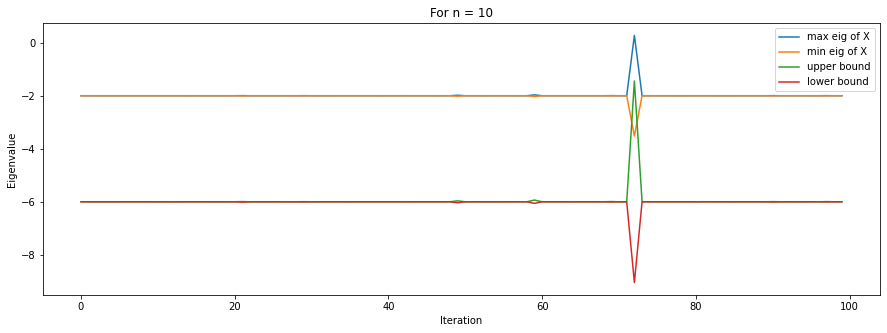

min_1 is -2.000000000036419 and min_2 is -2.0000000000002176
lower bound is -6.0000000000366365


min_1 is -2.0000000000016867 and min_2 is -2.000000000005935
lower bound is -6.0000000000076215


min_1 is -2.0000000000008513 and min_2 is -2.0000000000072684
lower bound is -6.00000000000812


min_1 is -2.000000000531671 and min_2 is -2.0000000000004805
lower bound is -6.000000000532152


min_1 is -2.000000000003859 and min_2 is -2.000000000001684
lower bound is -6.000000000005543


min_1 is -2.0000000000042046 and min_2 is -2.0000000000005915
lower bound is -6.000000000004796


min_1 is -2.0000000000055804 and min_2 is -2.000000000039124
lower bound is -6.000000000044704


min_1 is -2.000000000002132 and min_2 is -2.0000000000014344
lower bound is -6.000000000003567


min_1 is -2.0000000000011746 and min_2 is -2.0000000000115468
lower bound is -6.000000000012721


min_1 is -2.0000000000070983 and min_2 is -2.000000000208588
lower bound is -6.000000000215686


min_1 is -2.000000000007336

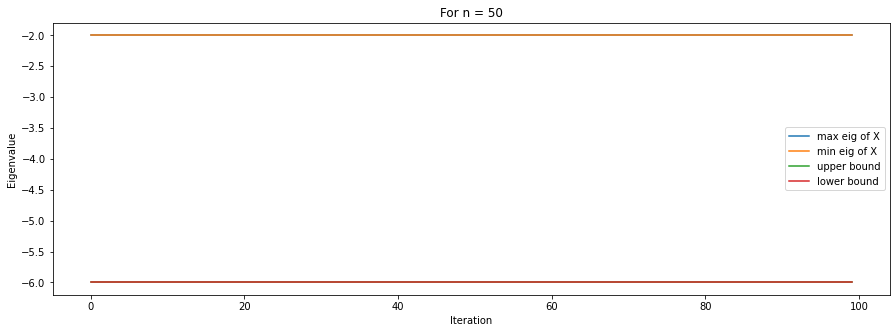

In [48]:
n_list = [10, 50]
for n in n_list:
    lower_bound = []
    upper_bound = []
    max_X = []
    min_X = []
    for i in range(100):
        C1 = generate_nonsingular_matrix(n)
        D1 = generate_psd_matrix(n)
        P11, P12, P13, P14 = gen_p_mat(C1, D1)

        C2 = generate_nonsingular_matrix(n)
        D2 = generate_psd_matrix(n)
        P21, P22, P23, P24 = gen_p_mat(C2, D2)

        # creating adjacency matrix for each layer (2 layers) with 50 nodes and 0.2 probability of zero elements for the first one and 0.5 for the second one
        I_adj_matrix1 = P11 # this is I+G11
        I_adj_matrix2 = P22 # this is I+G22

        # compute the maximum and minimum eigenvalues of the adjacency matrices
        max_eig1, min_eig1 = compute_eigenvalues(I_adj_matrix1 + I_adj_matrix1.T) # this is 2I+G11+G11.T
        max_eig2, min_eig2 = compute_eigenvalues(I_adj_matrix2 + I_adj_matrix2.T) # this is 2I+G22+G22.T
        print('min_1 is ' + str(min_eig1) + ' and min_2 is ' + str(min_eig2))
        lower_bound.append(min_eig1 + min_eig2 - 2)
        print('lower bound is ' + str(lower_bound[-1]) + '\n\n')
        upper_bound.append(max_eig1 + max_eig2 - 2)

        # creating the matrix we want to compute the eigenvalues of
        X = (I_adj_matrix1 + I_adj_matrix1.T + I_adj_matrix2 + I_adj_matrix2.T)/2 # this is 2I + G11 + G11.T + G22 + G22.T
    
        # computing the eigenvalues of the matrix   
        max_eig, min_eig = compute_eigenvalues(X)
        max_X.append(max_eig)
        min_X.append(min_eig)

    # plotting the lower and upper bounds and the eigenvalues of the matrix
    plt.figure(figsize=(15,5))
    plt.plot(max_X, label='max eig of X')
    plt.plot(min_X, label='min eig of X')
    plt.plot(upper_bound, label='upper bound')
    plt.plot(lower_bound, label='lower bound')
    plt.xlabel('Iteration')
    plt.ylabel('Eigenvalue')
    plt.title('Bounds check')
    plt.legend()
    plt.title('For n = '+str(n))
    plt.show()